# Customer Churn Prediction: Telecommunications Company

A predictive classification model developed by "name".

## Objectives:

This project has the following objectives:

- Analyze labeled data of 3333 customers who have been with the company for less than 243 days.
- Conduct inferential statistics and generate visualizations based on the data.
- Develop predictive supervised learning models to forecast customer churn.

Data:

This project utilizes the Churn in Telecom dataset obtained from Kaggle ([link](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset)).

The target variable for prediction is the "churn" column in the dataset.

The dataset includes various features such as customer location information (state and area code), plan details (call minutes, charges, customer service calls), and indicators for international plan and voice mail plan. To identify the best predictors of customer churn, different subsets and aggregations of these features were used during model iterations.


## Model:

The GradientBoostingClassifier, a widely utilized classification model, was employed in this project. For detailed explanations, please refer to the accompanying report (page 10 & Fig. 9 in page 11) .

Our models were evaluated using multiple metrics, including the recall score, confusion matrix, accuracy score, and f1 score. The recall score was prioritized as the evaluation metric due to the consideration of the cost and impact of false negative predictions. We recognized that it is more costly for the company if the model incorrectly predicts that a customer will stay subscribted, resulting in missed opportunities for allocating retention resources. Maximizing the recall score allows us to address this scenario effectively. Similarly, the f1 score was also utilized to assess the overall model performance, considering both precision and recall. Additionally, the accuracy score provides an overview of the model's performance and the number of true positive predictions.

# Table of contents:
- Data Cleaning and Exploratory Data Analysis (EDA)
- Target Variable Exploration: Churn 
- Feature analysis
- Model training

Please note that all the figures shown in the notebook are saved in the figures folder (same reporsitory)

# Data Cleaning and Exploratory Data Analysis:

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, make_scorer, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Set the plotting style and enable inline plotting
sns.set_style('whitegrid')
%matplotlib inline

## Data

You can download the dataset directly from the Kaggle website by clicking [here](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). 

In [3]:
# Read in data from the 'telecom_churn_data.csv' file using pandas
df = pd.read_csv('telecom_churn_data.csv')

# Display the first few rows of the DataFrame
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Cleaning

#### Clean up column headings:

In [4]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

#### Inspect null values and data types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Upon initial inspection, it appears that our dataframe does not contain any explicit null values. However, it is worth noting that there may be 'disguised' null values that require further investigation to confirm.

The majority of the features in our dataframe are of numerical type, with the exception of state, phone_number, international_plan, and voice_mail_plan, which are represented as strings. Our target variable, churn, is of boolean type.

To ensure data integrity, we will now proceed to inspect the unique values of each feature. This step will allow us to identify any potential 'null' values in disguise or unexpected values that may indicate errors in the data.

In [6]:
# Inspect unique values for each feature
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")
    print("------------------------------------------")


Unique values for state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
------------------------------------------
Unique values for account_length: [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  

After inspecting the unique values of each feature, no values of surprise or suspicion were found. Here are the key observations:

- The states column appears to contain normal and expected values.
- The international_plan and voice_mail_plan columns are binary features, represented by "yes" and "no" values. It might be beneficial to consider changing their data types to booleans or 1s and 0s.
- An interesting observation is that there are only three unique area_codes in the dataset. It would be worthwhile to investigate if a particular area code has a higher churn rate compared to others or if it's safe to drop the area code column. Additionally, since the area code is a categorical feature, changing its data type to categorical would be more appropriate.
- Given that phone_number is unlikely to have any influence on customer churn, it is reasonable to consider dropping this column.
- The account_length column appears to be discrete, consisting of integer values. The highest value of 243 suggests that it represents the number of days the customer has had their account open with the company. As the dataset mainly contains relatively new customers, this interpretation seems plausible.
- The number_vmail_messages column is also discrete and does not exhibit any abnormal values. Although the highest number of voicemails is 51, which might be considered high for the average person, it could be worth keeping this feature as it may serve as an indicator of churn.
- As expected, the customer_service_calls column is discrete and does not contain any apparent abnormal values.
- The columns related to minutes, calls, and charges seem to have reasonable values, without any notable anomalies at this stage.
- Lastly, our target variable, churn, has values of True and False, aligning with the expected binary representation.

#### Get an insight of the data using describe function

In [7]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Upon inspecting the range and central tendencies of the numeric data, all values still appear to be within reasonable ranges. At this stage, there is no evidence to suggest the presence of outliers or abnormal values among the features.

### Drop irrelevant features:

We will drop phone number because there is 0 correlation between it and our churn prediction

In [8]:
df.drop('phone_number', axis = 1, inplace = True)

### Explore Features:

Let's calculate the churn percentage by area code and generate a bar plot that visualizes the number of customers per area code, segmented by churn status.

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


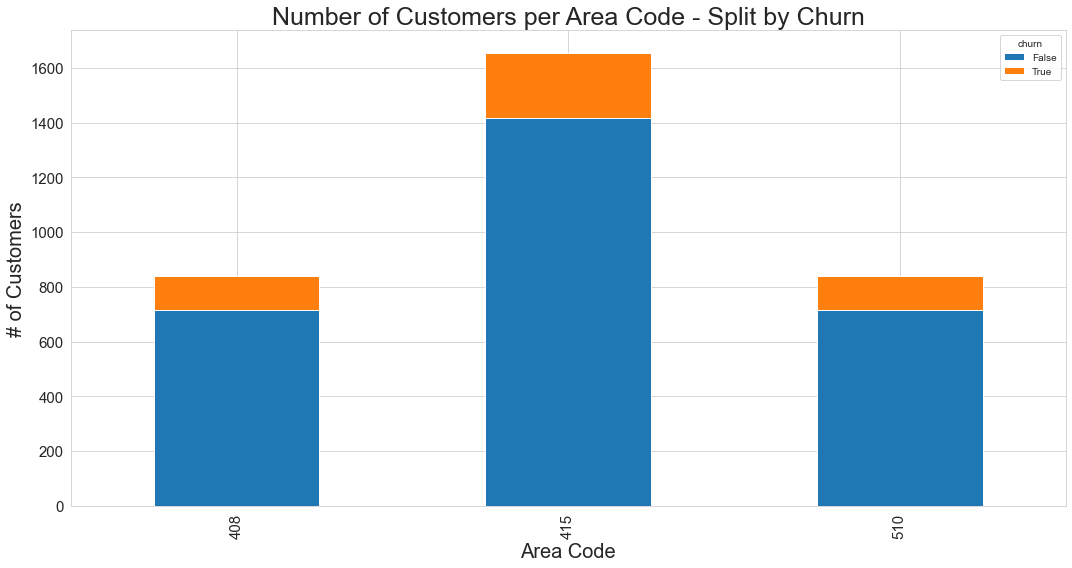

In [9]:
# Calculate the percentage of churn by area code
print(df.groupby(["area_code"])['churn'].mean())

# Create a bar plot showing the number of customers per area code, split by churn
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax=ax)

# Set plot title and axis labels
plt.title('Number of Customers per Area Code - Split by Churn', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Area Code', fontsize=20)
plt.ylabel('# of Customers', fontsize=20)

# Adjust plot layout and save the figure
plt.tight_layout()
plt.savefig('figures/cust_area_code.png')


Upon analyzing the data, it is evident that customer churn occurs at a relatively consistent rate of approximately 14-15% across all three area codes. Interestingly, even though area code 415 has the highest number of customers, it experiences churn at a similar rate to the other two area codes. Based on this observation, we have made the decision to drop the area code feature from our dataset as it does not provide significant differentiation in terms of churn behavior.

In [10]:
df.drop('area_code', axis = 1, inplace = True)

#### Minutes, Charge, Calls

Let's take a look at the correlation between minutes/charge/calls columns

<Axes: >

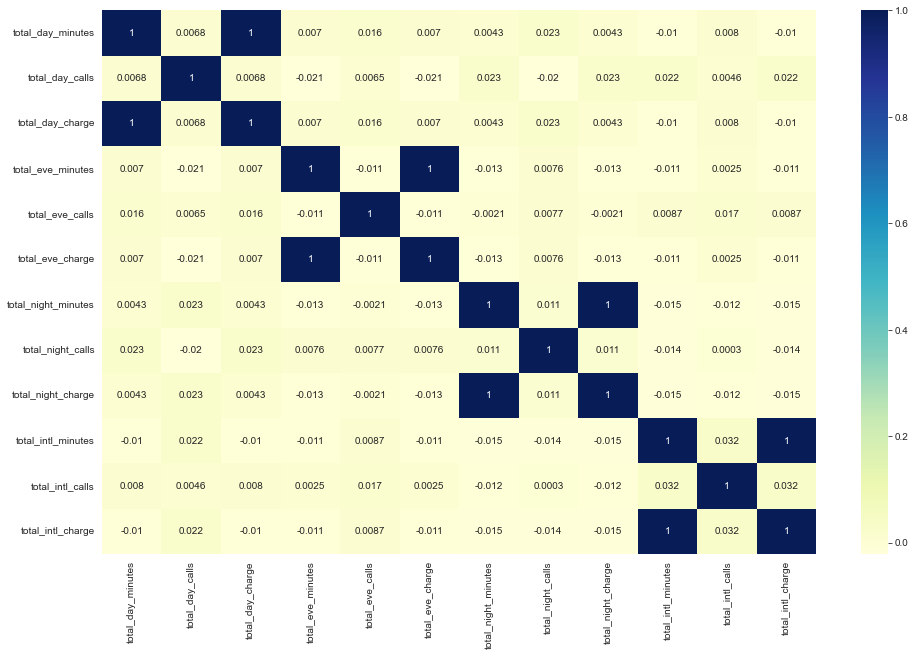

In [11]:
# see correlation matrix
fig, ax = plt.subplots(figsize=(16,10)) 
sns.heatmap(df.drop(['state', 'account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'customer_service_calls', 'churn'], axis = 1).corr(), cmap="YlGnBu", annot=True)

Upon examining the data, it is apparent that all the minutes and charge features exhibit a perfect correlation with a correlation coefficient (r) of 1. This finding is as expected since the charge is typically calculated based on the number of minutes used. The perfect correlation indicates that as the number of minutes increases, the corresponding charge also increases proportionally.

### Encoding string features

#### International Plan

Let's first change `international_plan` into 1's and 0's for easy binary coding. 

1 will represent that the person has an international plan, while 0 will represent not having an international plan. 

In [12]:
df.international_plan.replace(('yes', 'no'), (1, 0), inplace = True)

#### Voicemail Plan

Let's do the same for the `voice_mail_plan` column:

In [13]:
df.voice_mail_plan.replace(('yes', 'no'), (1, 0), inplace = True)

#### View Current Dataframe:

In [14]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Explore Target Variable: `churn`

Let's inspect the number churned customers in this dataset:

In [15]:
churn_vals = pd.DataFrame(df.churn.value_counts())
churn_vals

,churn
False,2850
True,483


And the proportion of customers who churned - remember, `True` means the customer churned:

In [16]:
churn_perc = pd.DataFrame(df.churn.value_counts()/len(df.churn))
churn_perc

,churn
False,0.855086
True,0.144914


### Visualizing percentages of customer churn prediction

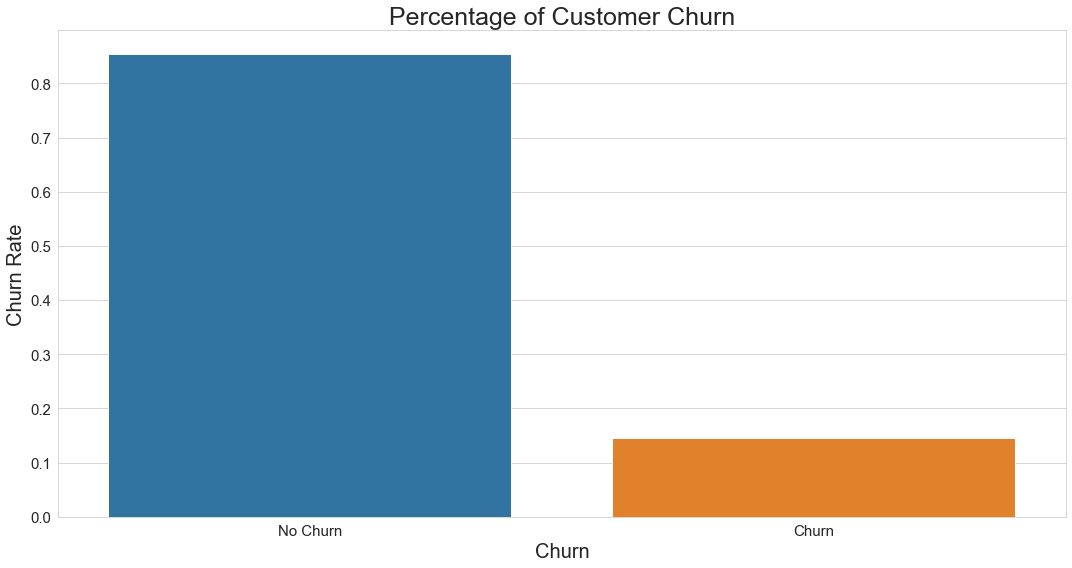

In [17]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=[0, 1], y='churn', data=churn_perc, ax=ax)

# Set plot title and axis labels
plt.title('Percentage of Customer Churn', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No Churn', 'Churn'])

# Adjust plot layout and save the figure
plt.tight_layout()
plt.savefig('figures/int_plan_churn.png')

This code generates a bar plot that visualizes the percentage of customer churn, distinguishing between "No Churn" and "Churn" categories. The plot provides insights into the churn rate and helps in understanding the distribution of churned and non-churned customers.

## Prepare Data for Modelling

### Create features and target dataframes. Then train test splitting our data

In [18]:
#features:
X = df.drop('churn', axis = 1)

#target:
y = df.churn

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### One Hot Encode `state` variable because it is an important feature


In [19]:
# Instantiate the OneHotEncoder object
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Fit the OneHotEncoder on the small train data
ohe.fit(X_train[['state']])

# Access the column names of the states
col_names = ohe.categories_[0]

# Create a DataFrame with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                                   index=X_train.index, 
                                   columns=col_names)

# Combine the encoded states with X_train and drop the old 'state' column
X_train = pd.concat([X_train.drop("state", axis=1), train_state_encoded], axis=1)


this code performs one-hot encoding on the 'state' column of the X_train DataFrame. It replaces the categorical 'state' column with a set of binary columns representing each unique state. This encoding enables the machine learning algorithm to process the categorical data effectively.

In [20]:
# Calculate correlations with churn
correlations = df.corr().churn.sort_values(ascending=False)
correlations

churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

This code calculates the correlations between each feature and the target variable 'churn' in the DataFrame 'df'. The correlations are computed using the corr() function, and then the resulting correlation values are sorted in descending order using the sort_values() method with the parameter ascending=False.


Let's visualise the two first features further.

### International Plan

In [21]:
# Create a DataFrame 'int_plan_churn' with the average churn rate for each 'international_plan' category
int_plan_churn = pd.DataFrame(df.groupby(['international_plan'])['churn'].mean())
int_plan_churn

,churn
international_plan,
0,0.114950
1,0.424149


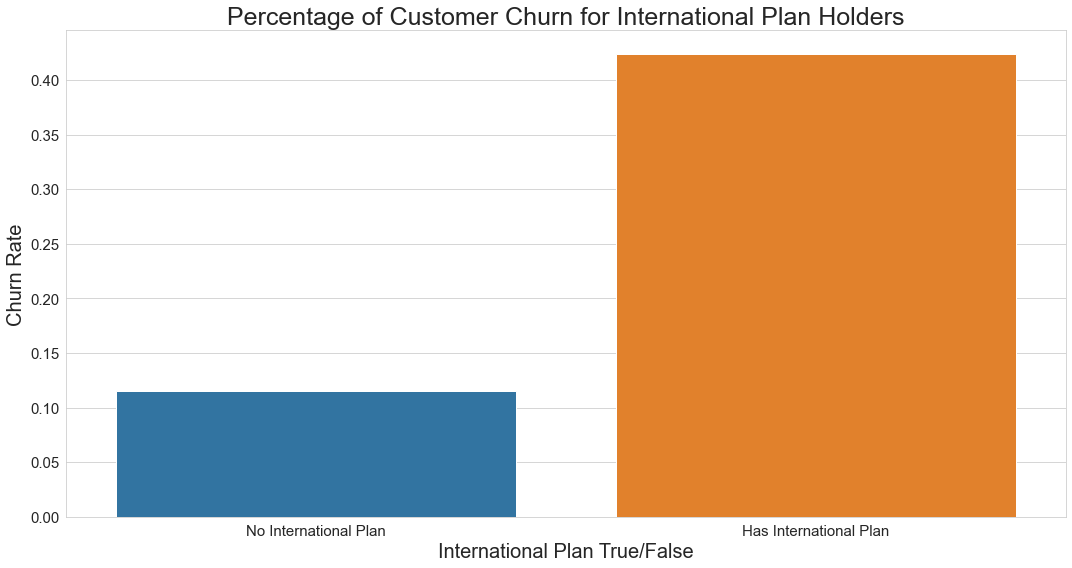

In [22]:
# Create a bar plot to visualize the percentage of customer churn for international plan holders
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=[0, 1], y='churn', data=int_plan_churn, ax=ax)

# Set plot title and axis labels
plt.title('Percentage of Customer Churn for International Plan Holders', fontsize=25)
plt.xlabel('International Plan True/False', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)

# Customize tick labels
ax.set_xticklabels(['No International Plan', 'Has International Plan'])

# Set tick label font size
ax.tick_params(axis='both', labelsize=15)

# Adjust plot layout
plt.tight_layout()

# Save the plot as an image file
plt.savefig('figures/int_plan_churn.png')


This code generates a bar plot to visualize the percentage of customer churn for international plan holders. It uses the Seaborn library to create the bar plot. The data for the plot is provided in the DataFrame 'int_plan_churn', where the 'churn' column represents the churn rates and the 'international_plan' column contains the categories for international plan (True/False).

So it appears that international plan holders is a deterministic factor of churn.  Roughly 42% of customers with an international plan end up churning.



### Customer Service Calls

Let's visualise in the same way the customer service calls data in relation to churn:

In [23]:
# Create a DataFrame 'csc' with the average churn rate for each 'customer_service_calls' category
csc = pd.DataFrame(df.groupby(['customer_service_calls'])['churn'].mean())
csc

,churn
customer_service_calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


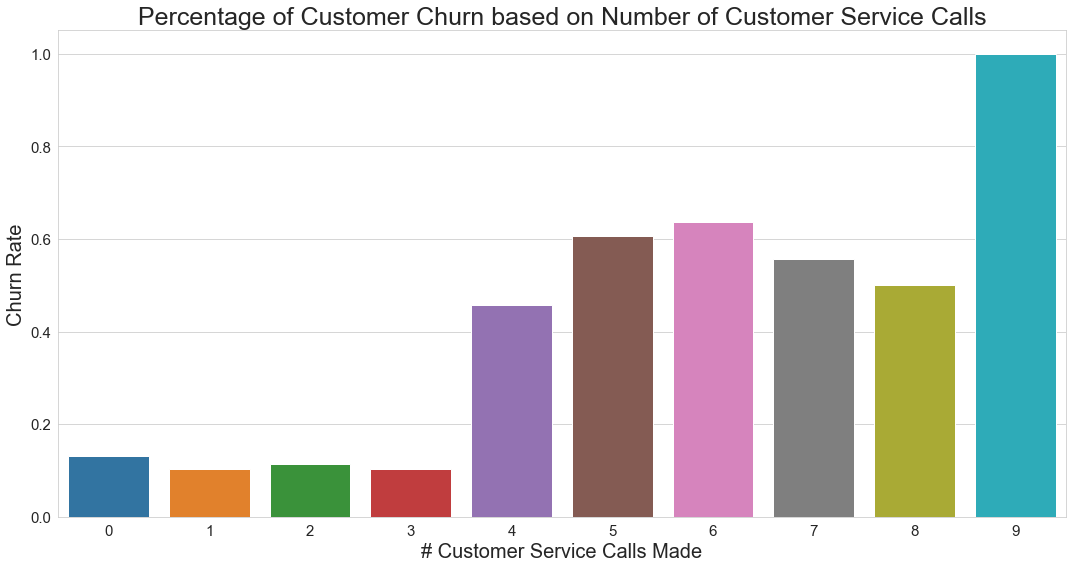

In [24]:
# Create a bar plot to visualize the percentage of customer churn based on the number of customer service calls
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y='churn', data=csc, ax=ax)

# Set plot title and axis labels
plt.title('Percentage of Customer Churn based on Number of Customer Service Calls', fontsize=25)
plt.xlabel('# Customer Service Calls Made', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)

# Set tick label font size
ax.tick_params(axis='both', labelsize=15)

# Adjust plot layout
plt.tight_layout()

# Save the plot as an image file
plt.savefig('figures/cust_serv_call_churn.png')


There is a significant increase in the churn rate for customers who make four or more calls to customer service. These customers exhibit a churn rate exceeding 40%. It is crucial to conduct further investigation to explore the additional characteristics of these customers in order to understand the reasons behind their frequent calls to customer service. This investigation can provide insights into how the company can improve its assistance and support for these customers, ultimately reducing churn and enhancing customer satisfaction.

In [25]:
# Calculate the average churn rate for each state and sort the results in descending order
state_churn_rate = df.groupby(['state'])['churn'].mean().sort_values(ascending=False)


# Model Training

- Model used : Gradient Boosting Classifier
- {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 0.13636363636363638, 'min_samples_split': 0.1} 

In [49]:
score = 0
ss = StandardScaler()
def ss_scale(X_train, X_test):
    """
    Scale the features using StandardScaler.

    Parameters:
    - X_train: Training data features
    - X_test: Test data features

    Returns:
    - X_train_scaled: Scaled training data features
    - X_test_scaled: Scaled test data features
    """

    # Instantiate StandardScaler
    

    # Scale the training data
    X_train_scaled = ss.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = ss.transform(X_test)

    return X_train_scaled, X_test_scaled

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_count = 0
for train_ind, val_ind in kf.split(X_train, y_train):
    fold_count += 1

    # Create performance DataFrame to store results
    performance = pd.DataFrame(columns=['Train_Recall', 'Test_Recall', 'Test_Specificity'])

    # Create recall scorer
    recall = make_scorer(recall_score)

    # Split the data into training and validation sets
    X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]

    # Scale the training and validation sets
    X_t_sc, X_val_sc = ss_scale(X_t, X_val)

    # Instantiate SMOTE and balance the training set
    smote = SMOTE(random_state=42)
    X_t_sc_bal, y_t_bal = smote.fit_resample(X_t_sc, y_t)

    # Instantiate and configure the GradientBoostingClassifier
    clf = GradientBoostingClassifier(
        loss='exponential',
        learning_rate=0.01,
        min_samples_leaf=0.1,
        min_samples_split=0.13636363636363638,
        max_depth=3,
        criterion='friedman_mse',
        random_state=15
    )

    # Perform cross-validation on the balanced training set
    train_cv = cross_val_score(X=X_t_sc_bal, y=y_t_bal, estimator=clf, scoring=recall, cv=10)

    clf.fit(X_t_sc_bal, y_t_bal)
    # Fit the classifier on the balanced training set and predict on the validation set
    y_pred = clf.predict(X_val_sc)
    

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Store performance results in the DataFrame
    performance.loc['GBC_exp_maxd3_mae_ss',
                    ['Train_Recall', 'Test_Recall', 'Test_Specificity', 'accuracy_score', 'f1_score']] = [
        train_cv.mean(),
        recall_score(y_val, y_pred),
        conf_matrix[0, 0] / conf_matrix[0, :].sum(),
        accuracy_score(y_val, y_pred),
        f1_score(y_val, y_pred)
    ]

    score += accuracy_score(y_val, y_pred)
    print(performance)
    

score = score/fold_count
print("===================================")
print(f"Final accuracy score : {score*100} %.")



                     Train_Recall Test_Recall Test_Specificity  \
GBC_exp_maxd3_mae_ss     0.816424       0.675         0.878571   

                      accuracy_score  f1_score  
GBC_exp_maxd3_mae_ss           0.846  0.583784  
                     Train_Recall Test_Recall Test_Specificity  \
GBC_exp_maxd3_mae_ss     0.840347    0.786667         0.816471   

                      accuracy_score  f1_score  
GBC_exp_maxd3_mae_ss           0.812  0.556604  
                     Train_Recall Test_Recall Test_Specificity  \
GBC_exp_maxd3_mae_ss     0.847307    0.779412         0.803241   

                      accuracy_score  f1_score  
GBC_exp_maxd3_mae_ss             0.8  0.514563  
                     Train_Recall Test_Recall Test_Specificity  \
GBC_exp_maxd3_mae_ss     0.848637    0.871429          0.82093   

                      accuracy_score  f1_score  
GBC_exp_maxd3_mae_ss           0.828  0.586538  
                     Train_Recall Test_Recall Test_Specificity  \
GBC_exp_ma

This code performs cross-validation and evaluation of a GradientBoostingClassifier model using a KFold strategy.

## Real time test for our model

Let's take the first ten customers if the dataset, we already know their churn status, but we will compare it with our model's results to see if our model can predict them correctly. We will choose ten elements from our datasets and then we will compare the results

In [69]:
a = 10
b = a+10
comparison_df = pd.DataFrame()
ten_customers_Y = y_train[a:b]
ten_customers_X = X_train[a:b]

ten_customers_X = ss.transform(ten_customers_X)

comparison_df["Real churn value"] =  y_train[a:b]
comparison_df["Predicted churn value"] = clf.predict(ten_customers_X)
comparison_df["is prediction equal"] = ["Equal" if i == j else "Not equal" for (i,j) in zip(comparison_df["Real churn value"],comparison_df["Predicted churn value"])]


comparison_df

,Real churn value,Predicted churn value,is prediction equal
2123,False,False,Equal
490,False,False,Equal
2986,False,False,Equal
2632,False,False,Equal
498,True,True,Equal
2022,False,False,Equal
210,False,True,Not equal
1352,False,False,Equal
1181,False,False,Equal
650,False,False,Equal


We can see that our model predicted 9/10 churn values correctly, this helps us test our model and evaluate its accuracy by our observation.
The model is quite accurate and can be used by the company.